In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e4/sample_submission.csv
/kaggle/input/playground-series-s5e4/train.csv
/kaggle/input/playground-series-s5e4/test.csv


# Data Overview

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv('/kaggle/input/playground-series-s5e4/train.csv')

In [5]:
train.head(1)

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998


In [6]:
test = pd.read_csv('/kaggle/input/playground-series-s5e4/test.csv')

In [7]:
test.head(1)

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [9]:
train.isnull().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [10]:
train.set_index('id', inplace=True)
test.set_index('id', inplace=True)

train.head(1)

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
id,,,,,,,,,,,
0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998


In [11]:
def fill_missing_val (df, column):
    df[column] = df.groupby(['Podcast_Name', 'Publication_Day', 'Publication_Time'])[column].transform(lambda x: x.fillna(x.median()))
    return 

fill_missing_val(train, 'Episode_Length_minutes')
fill_missing_val(test, 'Episode_Length_minutes')

In [12]:
train['Guest_Popularity_percentage'].sample(10)

id
595915    54.49
716028    38.53
234089    75.60
428519     6.99
465303    90.16
327468     9.85
426208    16.35
462187    46.65
233795    23.33
209699      NaN
Name: Guest_Popularity_percentage, dtype: float64

In [13]:
train['Guest_Popularity_percentage'].fillna(0,inplace = True)
test['Guest_Popularity_percentage'].fillna(0,inplace = True)

In [14]:
train.isnull().sum()

Podcast_Name                   0
Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  1
Episode_Sentiment              0
Listening_Time_minutes         0
dtype: int64

In [15]:
train['Number_of_Ads'].fillna(0,inplace = True)
test['Number_of_Ads'].fillna(0,inplace = True)

In [16]:
train.duplicated().sum()
test.duplicated().sum()

0

In [17]:
train.columns

Index(['Podcast_Name', 'Episode_Title', 'Episode_Length_minutes', 'Genre',
       'Host_Popularity_percentage', 'Publication_Day', 'Publication_Time',
       'Guest_Popularity_percentage', 'Number_of_Ads', 'Episode_Sentiment',
       'Listening_Time_minutes'],
      dtype='object')

In [18]:
train.describe()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,64.426564,59.859901,42.065664,1.348853,45.437406
std,31.029068,22.873098,32.858857,1.151131,27.138306
min,0.000000,1.300000,0.000000,0.000000,0.000000
25%,39.420000,39.410000,7.850000,0.000000,23.178350
50%,63.870000,60.050000,42.200000,1.000000,43.379460
75%,90.310000,79.530000,71.040000,2.000000,64.811580
max,325.240000,119.460000,119.910000,103.910000,119.970000


In [19]:
train['Number_of_Ads'].value_counts()

Number_of_Ads
0.00      217593
1.00      214069
3.00      160173
2.00      158156
103.25         2
53.37          1
103.00         1
103.91         1
53.42          1
103.75         1
12.00          1
103.88         1
Name: count, dtype: int64

# **EDA**

# Univariate Analysis 

Genre
Sports        87606
Technology    86256
True Crime    85059
Lifestyle     82461
Comedy        81453
Business      80521
Health        71416
News          63385
Music         62743
Education     49100
Name: count, dtype: int64


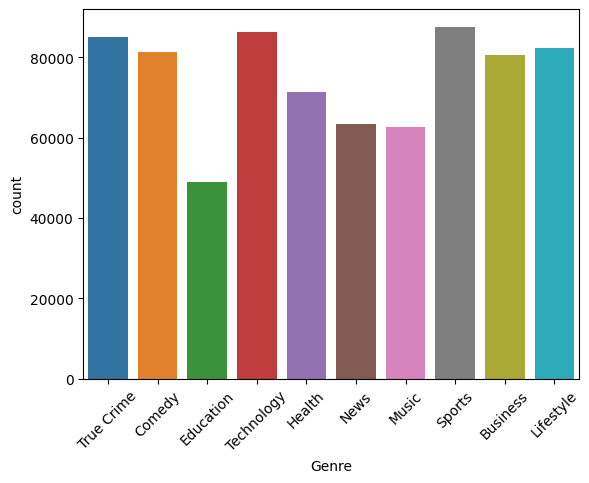

In [20]:
print(train['Genre'].value_counts())
sns.countplot(data=train, x='Genre')
plt.xticks(rotation=45)
plt.show()

array([[<Axes: title={'center': 'Episode_Length_minutes'}>,
        <Axes: title={'center': 'Host_Popularity_percentage'}>],
       [<Axes: title={'center': 'Guest_Popularity_percentage'}>,
        <Axes: title={'center': 'Number_of_Ads'}>],
       [<Axes: title={'center': 'Listening_Time_minutes'}>, <Axes: >]],
      dtype=object)

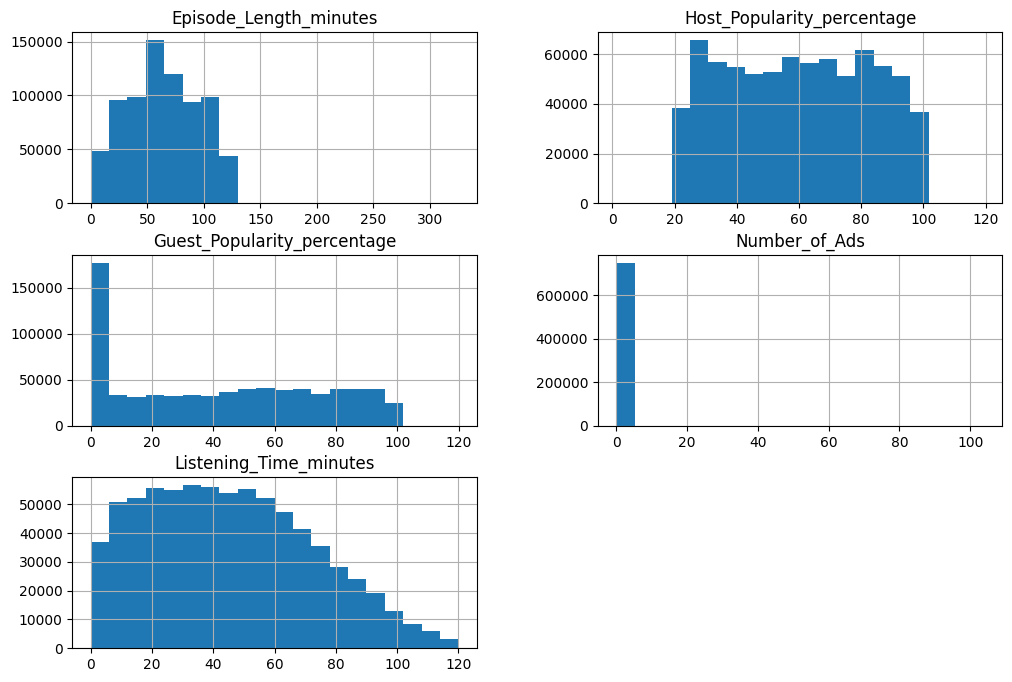

In [21]:
num_cols = ['Episode_Length_minutes', 'Host_Popularity_percentage', 'Guest_Popularity_percentage', 'Number_of_Ads', 'Listening_Time_minutes']
train[num_cols].hist(bins=20, figsize=(12, 8))


<Axes: xlabel='Listening_Time_minutes'>

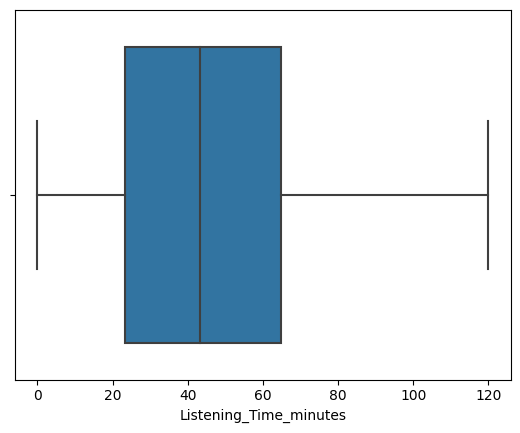

In [22]:
sns.boxplot(data=train, x='Listening_Time_minutes')

# Bivariate Analysis

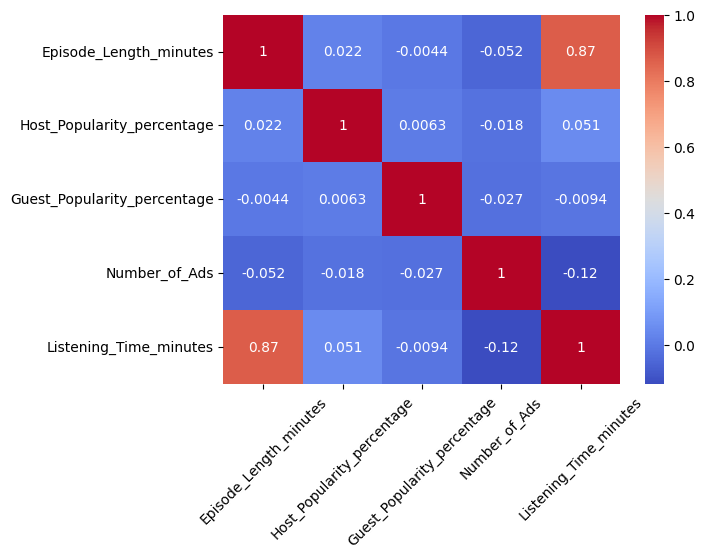

In [23]:

sns.heatmap(train[num_cols].corr(), annot=True, cmap='coolwarm')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Publication_Day', ylabel='Listening_Time_minutes'>

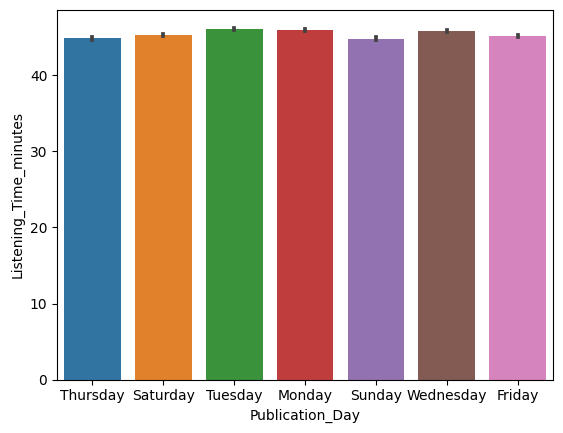

In [24]:

sns.barplot(data=train, x='Publication_Day', y='Listening_Time_minutes')

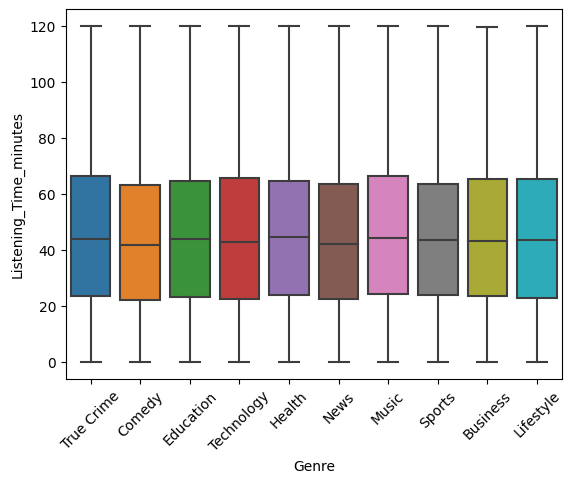

In [25]:
sns.boxplot(data=train, x='Genre', y='Listening_Time_minutes')
plt.xticks(rotation=45)
plt.show()

In [26]:
train.columns

Index(['Podcast_Name', 'Episode_Title', 'Episode_Length_minutes', 'Genre',
       'Host_Popularity_percentage', 'Publication_Day', 'Publication_Time',
       'Guest_Popularity_percentage', 'Number_of_Ads', 'Episode_Sentiment',
       'Listening_Time_minutes'],
      dtype='object')

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Podcast_Name                 750000 non-null  object 
 1   Episode_Title                750000 non-null  object 
 2   Episode_Length_minutes       750000 non-null  float64
 3   Genre                        750000 non-null  object 
 4   Host_Popularity_percentage   750000 non-null  float64
 5   Publication_Day              750000 non-null  object 
 6   Publication_Time             750000 non-null  object 
 7   Guest_Popularity_percentage  750000 non-null  float64
 8   Number_of_Ads                750000 non-null  float64
 9   Episode_Sentiment            750000 non-null  object 
 10  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), object(6)
memory usage: 68.7+ MB


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import  Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error,accuracy_score

In [30]:
train = train.drop(['Episode_Title', 'Podcast_Name'], axis=1)
test = test.drop(['Episode_Title', 'Podcast_Name'], axis=1)

In [31]:
train = pd.get_dummies(train, columns=['Genre', 'Episode_Sentiment', 'Publication_Day'], drop_first=True)


test = pd.get_dummies(test, columns=['Genre', 'Episode_Sentiment', 'Publication_Day'], drop_first=True)


In [32]:
bool_cols = train.select_dtypes(include='bool').columns
train[bool_cols] = train[bool_cols].astype(int)

bool_cols = test.select_dtypes(include='bool').columns
test[bool_cols] = test[bool_cols].astype(int)

In [33]:
train.head(5)

,Episode_Length_minutes,Host_Popularity_percentage,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes,Genre_Comedy,Genre_Education,Genre_Health,Genre_Lifestyle,...,Genre_Technology,Genre_True Crime,Episode_Sentiment_Neutral,Episode_Sentiment_Positive,Publication_Day_Monday,Publication_Day_Saturday,Publication_Day_Sunday,Publication_Day_Thursday,Publication_Day_Tuesday,Publication_Day_Wednesday
id,,,,,,,,,,,,,,,,,,,,,
0,67.78,74.81,Night,0.00,0.0,31.41998,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,119.80,66.95,Afternoon,75.95,2.0,88.01241,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,73.90,69.97,Evening,8.97,0.0,44.92531,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,67.17,57.22,Morning,78.70,2.0,46.27824,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0
4,110.51,80.07,Afternoon,58.68,3.0,75.61031,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [34]:
train['Publication_Time'].unique()

array(['Night', 'Afternoon', 'Evening', 'Morning'], dtype=object)

In [35]:
from sklearn.preprocessing import OrdinalEncoder

time_order = [['Morning', 'Evening', 'Afternoon', 'Night']]
encoder = OrdinalEncoder(categories=time_order)
train['Publication_Time_Encoded'] = encoder.fit_transform(train[['Publication_Time']]).astype(int)
train = train.drop('Publication_Time', axis=1)


In [36]:
from sklearn.preprocessing import OrdinalEncoder

time_order = [['Morning', 'Evening', 'Afternoon', 'Night']]
encoder = OrdinalEncoder(categories=time_order)
test['Publication_Time_Encoded'] = encoder.fit_transform(test[['Publication_Time']]).astype(int)
test = test.drop('Publication_Time', axis=1)

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['Episode_Length_minutes', 'Host_Popularity_percentage',
            'Guest_Popularity_percentage', 'Number_of_Ads', 'Publication_Time_Encoded']

train[num_cols] = scaler.fit_transform(train[num_cols])
test[num_cols] = scaler.fit_transform(test[num_cols])

In [38]:
X = train.drop(columns = ['Listening_Time_minutes'])
y = train['Listening_Time_minutes']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

# Define your model dictionary
models = {
    'XG Boost': XGBRegressor(),
    
    'Random Forest': RandomForestRegressor(),
    
}

# Evaluate models using cross-validation (on training set)
rmse_scores = {}

for name, model in models.items():
    # Negative MSE so we multiply by -1 and take sqrt
    neg_mse = cross_val_score(model, X_train, y_train, 
                              scoring='neg_mean_squared_error', cv=2)
    rmse = np.sqrt(-neg_mse.mean())
    rmse_scores[name] = rmse

# Display the RMSE scores
for model_name, rmse in rmse_scores.items():
    print(f"{model_name}: RMSE = {rmse:.4f}")


XG Boost: RMSE = 13.1509
Random Forest: RMSE = 13.0871
